In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
combined_data = pd.read_csv('./dashboard/cleaned_combined_data.csv')

In [6]:
combined_data.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  data.csv  
1  1023.2 -18.2   0.0    N   4.7  data.csv  
2  1023.5 -18.2   0.0  NNW   5.6  data.csv  
3  1024.5 -19.4   0.0   NW   3.1  data.csv  
4  1025.2 -19.5   0.0    N   2.0  data.csv

In [7]:
combined_data['datetime'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']])

In [8]:
combined_data.set_index('datetime', inplace=True)

In [9]:
combined_data.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                   
2013-03-01 00:00:00   1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00   2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00   4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  12.0  12.0   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2013-03-01 00:00:00  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   
2013-03-01 01:00:00  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   
2013-03-01 02:00:00  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   
2013-03-01 03:00:00  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   
2013-03-01 04:00:00  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   

                      station  
datetime                       
2013-03-01 00:00:00  data.csv  
2013-03-01 01:00:00  data.csv  
2013-03-01 02:00:00  data.csv  
2013-03-01 03:00:00  data.csv  
2013-03-01 04:00:00  data.csv

In [10]:
combined_data.describe(include="all")

No          year         month           day          hour  \
count   1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.753250e+04  2.014663e+03  6.522930e+00  1.572964e+01  1.150000e+01   
std     1.012211e+04  1.177197e+00  3.448705e+00  8.800096e+00  6.922189e+00   
min     1.000000e+00  2.013000e+03  1.000000e+00  1.000000e+00  0.000000e+00   
25%     8.766750e+03  2.014000e+03  4.000000e+00  8.000000e+00  5.750000e+00   
50%     1.753250e+04  2.015000e+03  7.000000e+00  1.600000e+01  1.150000e+01   
75%     2.629825e+04  2.016000e+03  1.000000e+01  2.300000e+01  1.725000e+01   
max     3.506400e+04  2.017000e+03  1.200000e+01  3.100000e+01  2.300000e+01   

               PM2.5          PM10           SO2           NO2            CO  \
count   1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    7.983042e+01  1.048044e+02  1.351445e+01  5.063348e+01  1.130127e+03   
std     8.102627e+01  9.254952e+01  1.405647e+01  3.516844e+01  8.296363e+02   
min     2.000000e+00  2.000000e+00  2.856000e-01  1.026500e+00  1.000000e+02   
25%     2.000000e+01  3.600000e+01  3.000000e+00  2.300000e+01  5.000000e+02   
50%     5.500000e+01  8.200000e+01  7.000000e+00  4.300000e+01  8.000000e+02   
75%     1.110000e+02  1.450000e+02  2.000000e+01  7.100000e+01  1.500000e+03   
max     9.570000e+02  9.950000e+02  4.550000e+01  2.900000e+02  3.000000e+03   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06  1.262304e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    5.546784e+01  1.353170e+01  1.010754e+03  2.482433e+00  6.391899e-02   
std     5.153477e+01  1.143803e+01  1.047471e+01  1.379723e+01  7.975802e-01   
min     2.142000e-01 -1.990000e+01  9.824000e+02 -4.340000e+01  0.000000e+00   
25%     1.000000e+01  3.100000e+00  1.002300e+03 -8.900000e+00  0.000000e+00   
50%     4.400000e+01  1.450000e+01  1.010400e+03  3.000000e+00  0.000000e+00   
75%     8.200000e+01  2.330000e+01  1.019000e+03  1.510000e+01  0.000000e+00   
max     1.900000e+02  4.160000e+01  1.042800e+03  2.910000e+01  5.210000e+01   

             wd          WSPM   station  
count   1262304  1.262304e+06   1262304  
unique       16           NaN        13  
top          NE           NaN  data.csv  
freq     130959           NaN    841536  
mean        NaN  1.730037e+00       NaN  
std         NaN  1.246553e+00       NaN  
min         NaN  0.000000e+00       NaN  
25%         NaN  9.000000e-01       NaN  
50%         NaN  1.400000e+00       NaN  
75%         NaN  2.200000e+00       NaN  
max         NaN  1.320000e+01       NaN

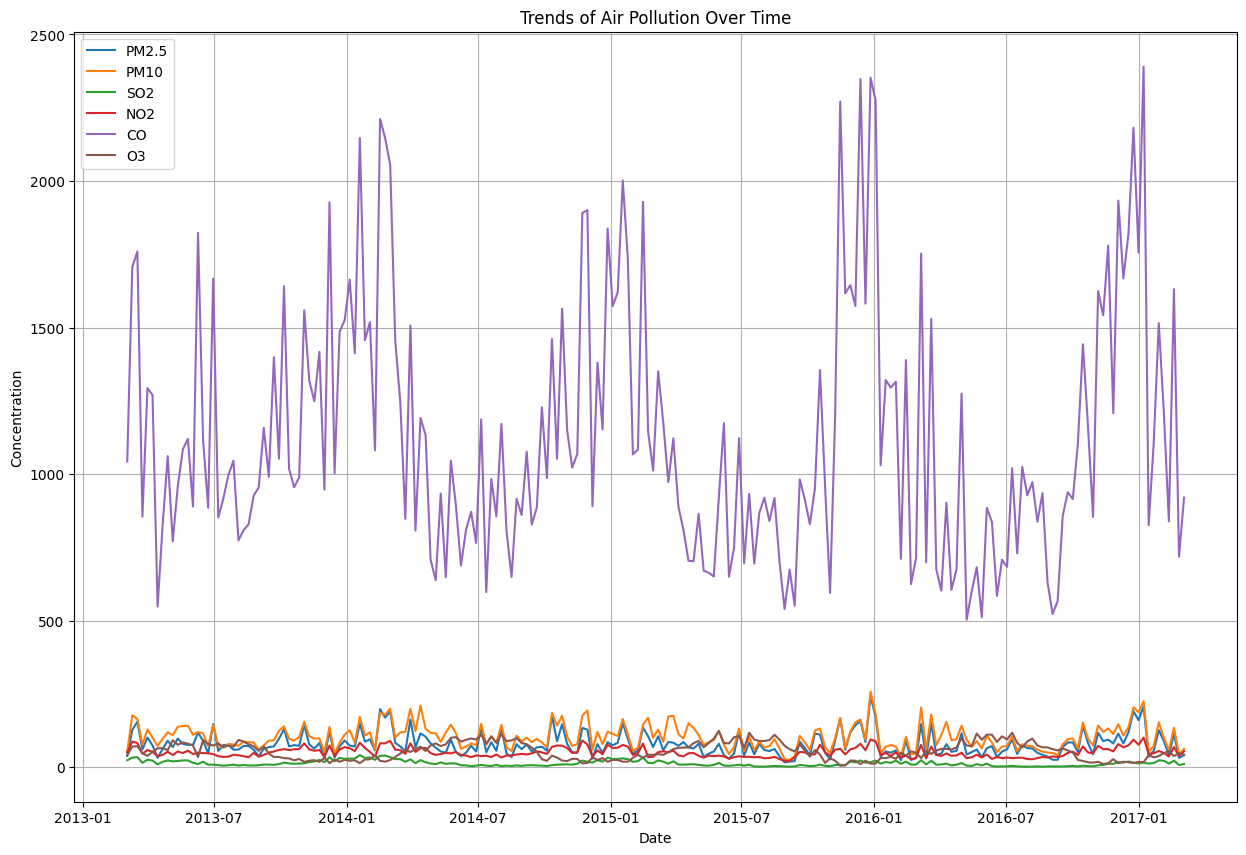

In [11]:
daily_data = combined_data.resample('W').mean(numeric_only=True)

plt.figure(figsize=(15, 10))
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.plot(daily_data.index, daily_data[pollutant], label=pollutant)
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Trends of Air Pollution Over Time')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ichaa\AppData\Local\Temp\ipykernel_17240\2649919961.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = combined_data.resample('M').mean(numeric_only=True)


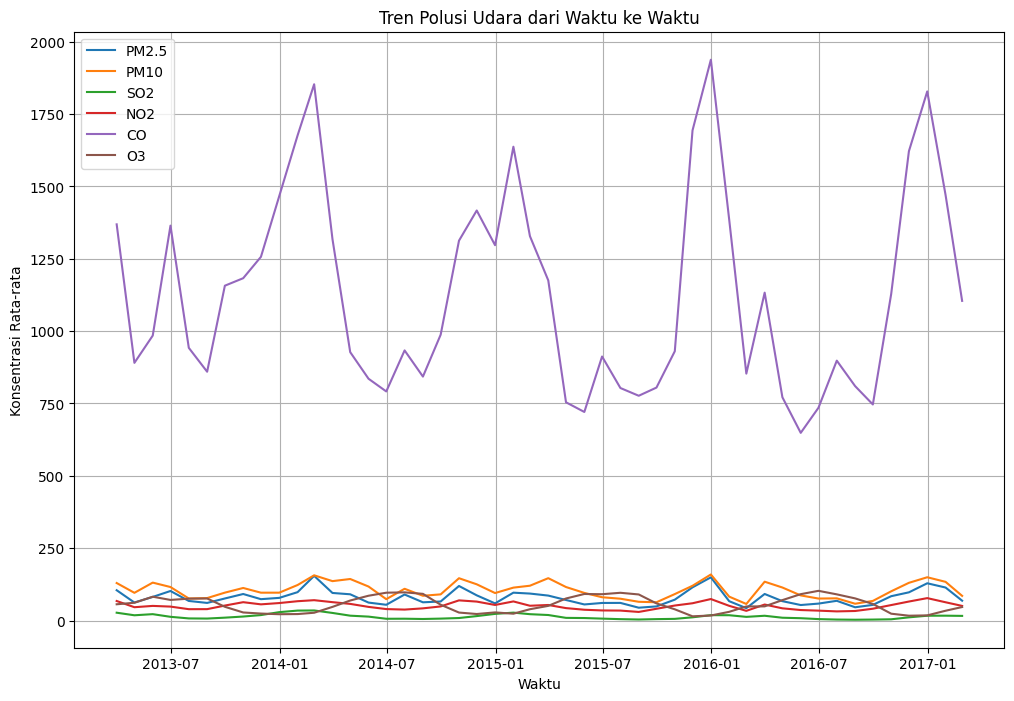

In [12]:
monthly_data = combined_data.resample('M').mean(numeric_only=True)

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(12, 8))

for pollutant in pollutants:
    plt.plot(monthly_data.index, monthly_data[pollutant], label=pollutant)

plt.title('Tren Polusi Udara dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Rata-rata')
plt.legend()
plt.grid(True)
plt.show()

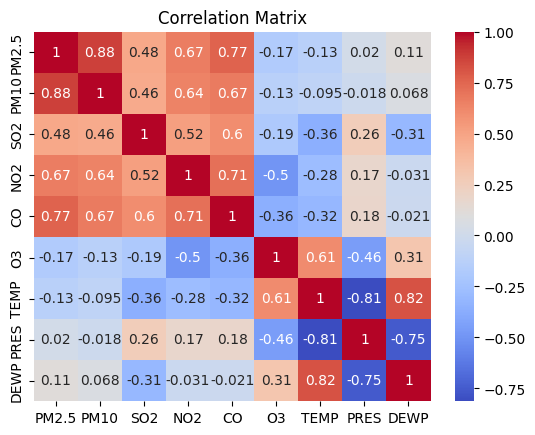

In [13]:
correlation_matrix = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

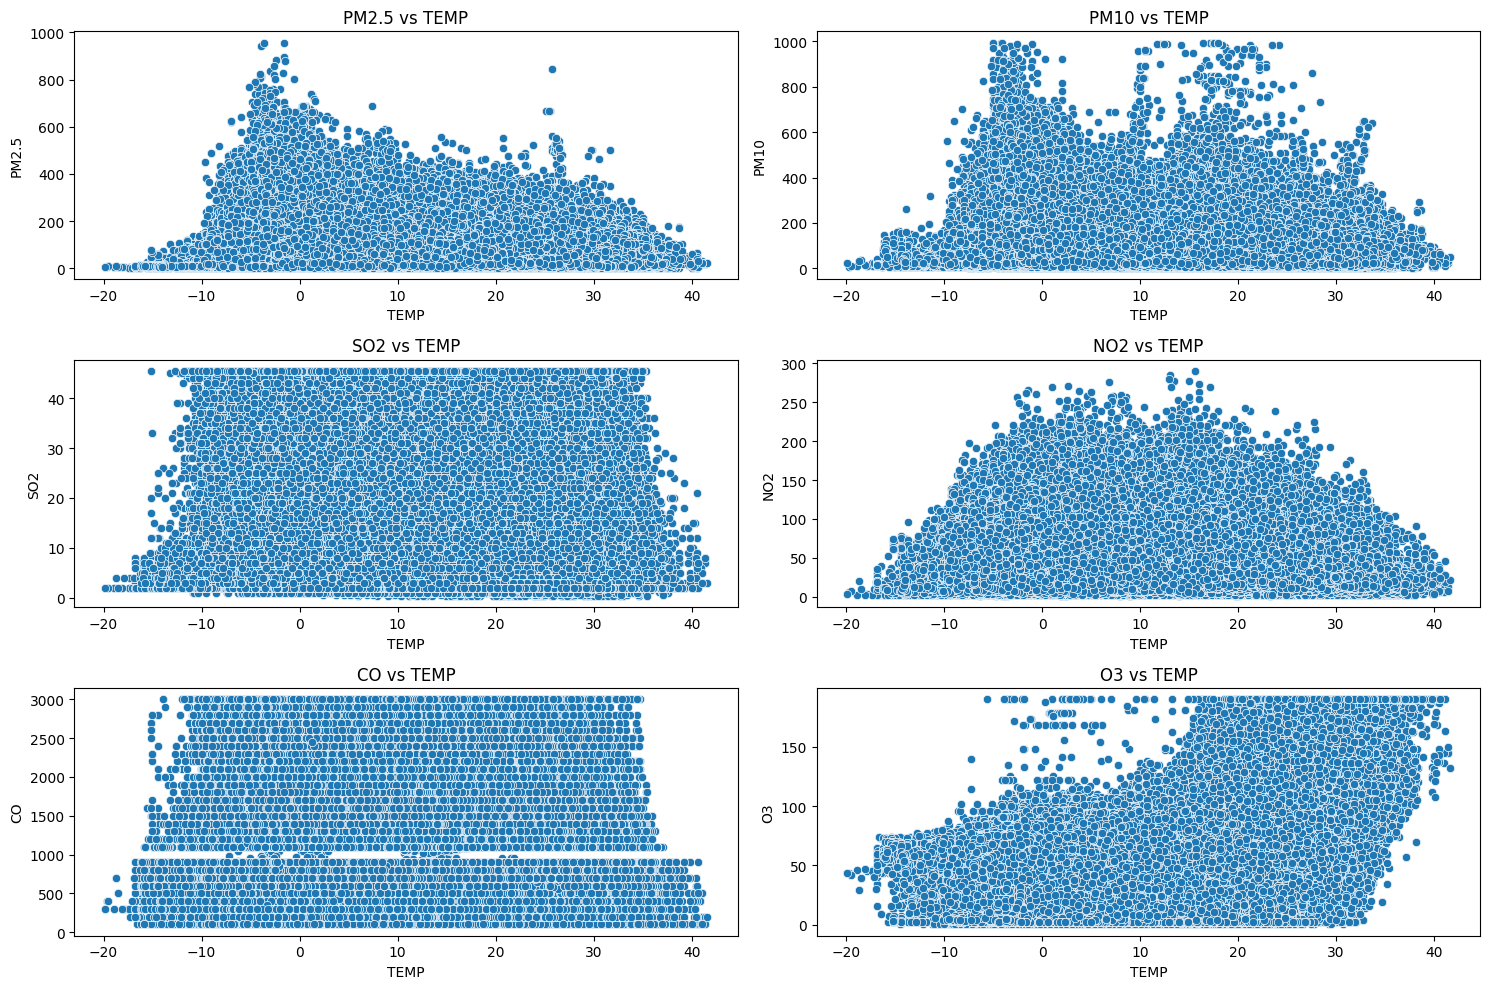

In [14]:
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=combined_data, x='TEMP', y=pollutant)
    plt.title(f'{pollutant} vs TEMP')
plt.tight_layout()
plt.show()

In [15]:
station_grouped = combined_data.groupby('station').mean(numeric_only=True)

# Find max and min for each pollutant
for pollutant in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    max_station = station_grouped[pollutant].idxmax()
    min_station = station_grouped[pollutant].idxmin()
    print(f'{pollutant}:')
    print(f'  Highest: {max_station} with value {station_grouped.loc[max_station, pollutant]}')
    print(f'  Lowest: {min_station} with value {station_grouped.loc[min_station, pollutant]}')

PM2.5:
  Highest: Dongsi with value 86.09405800821355
  Lowest: Dingling with value 66.36643993839836
PM10:
  Highest: Gucheng with value 119.00909194615559
  Lowest: Dingling with value 84.26879990873832
SO2:
  Highest: Dongsi with value 15.629900433493042
  Lowest: Huairou with value 10.687216586812685
NO2:
  Highest: Wanliu with value 64.69575934006389
  Lowest: Dingling with value 28.084898037873604
CO:
  Highest: Wanshouxigong with value 1234.126326146475
  Lowest: Dingling with value 896.4963352726443
O3:
  Highest: Dingling with value 66.64288470225873
  Lowest: Wanliu with value 46.370803775952545


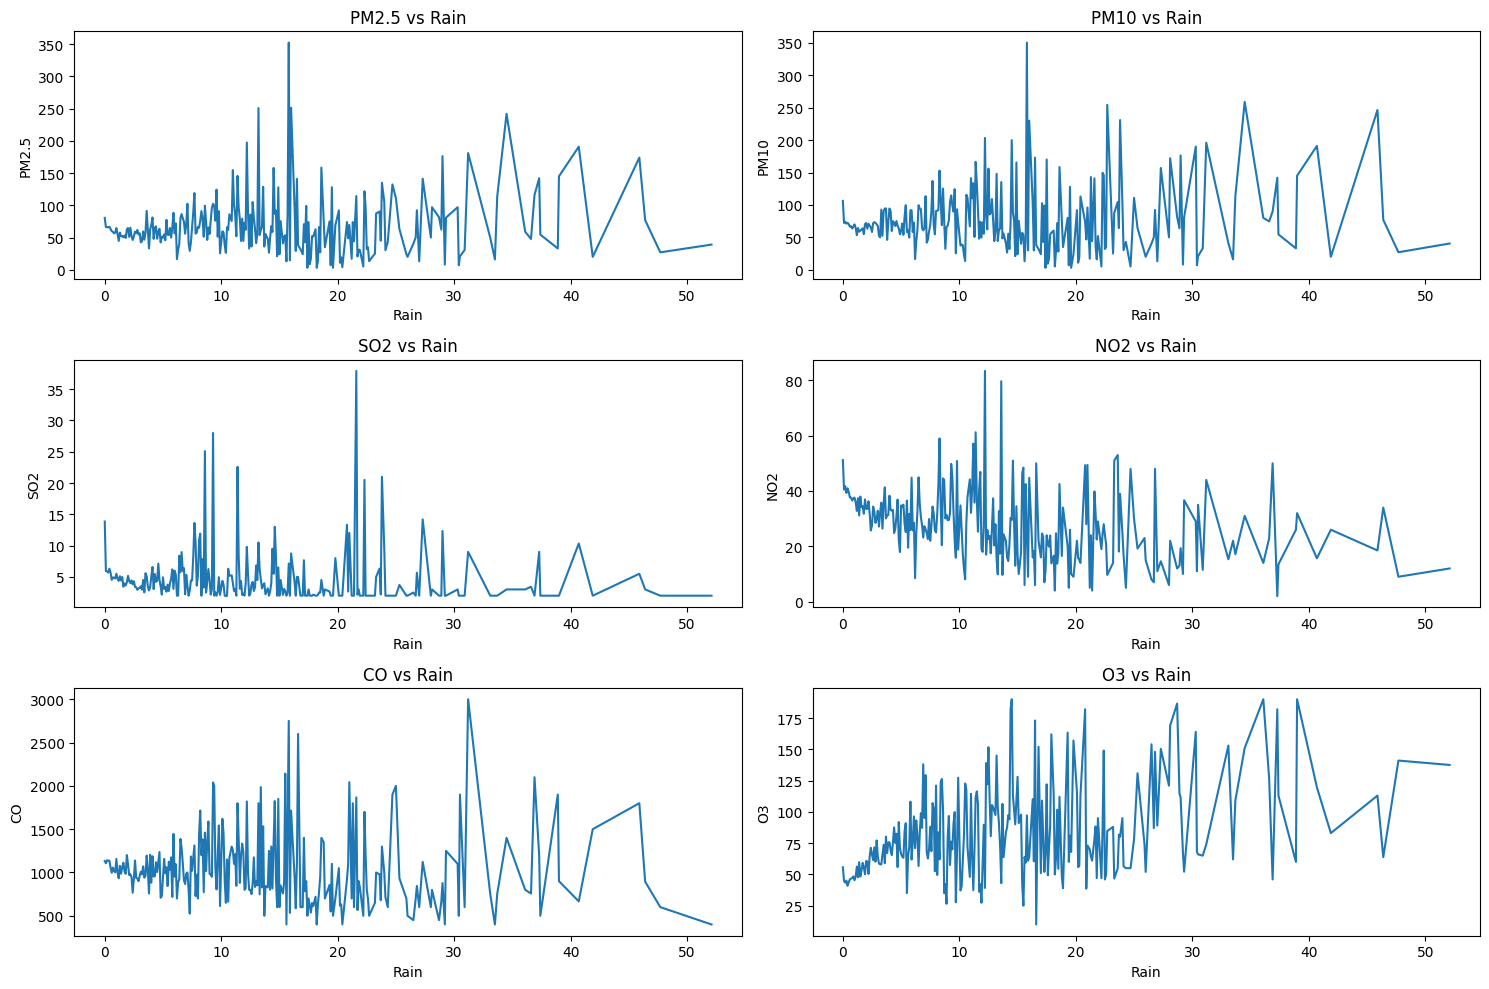

In [16]:
rain_grouped = combined_data.groupby('RAIN').mean(numeric_only=True)

plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    plt.subplot(3, 2, i+1)
    plt.plot(rain_grouped.index, rain_grouped[pollutant])
    plt.xlabel('Rain')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} vs Rain')
plt.tight_layout()
plt.show()

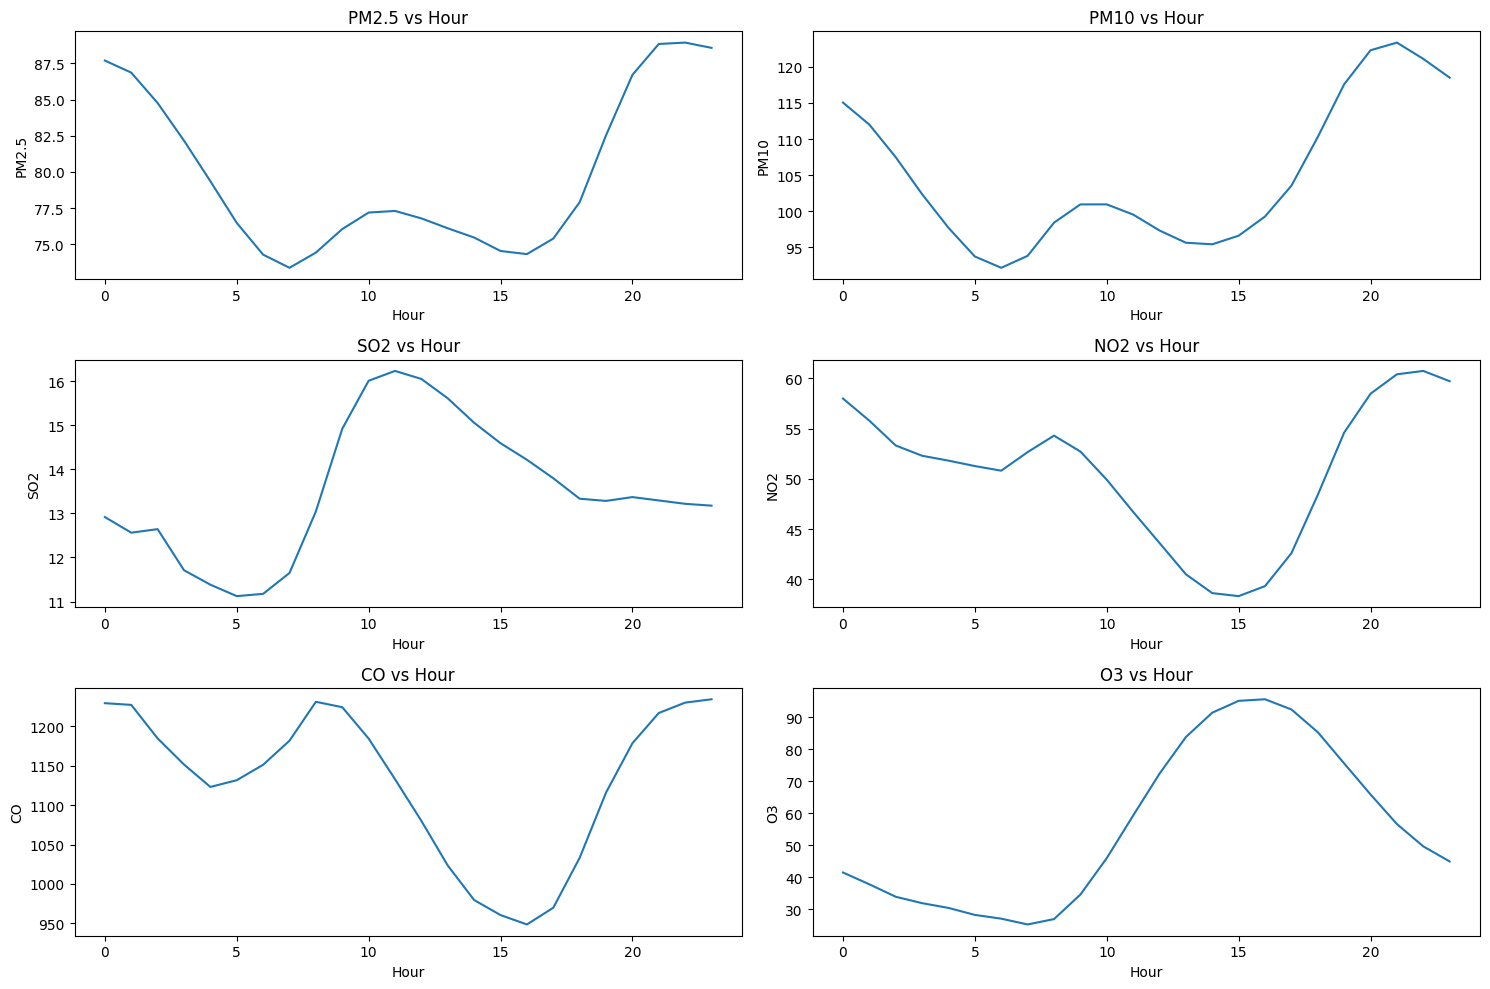

In [17]:
combined_data['hour'] = combined_data.index.hour
hour_grouped = combined_data.groupby('hour').mean(numeric_only=True)
plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    plt.subplot(3, 2, i+1)
    plt.plot(hour_grouped.index, hour_grouped[pollutant])
    plt.xlabel('Hour')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} vs Hour')
plt.tight_layout()
plt.show()

In [18]:
combined_data.groupby(by="hour").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

PM2.5                           
        max  min       mean        std
hour                                  
0     809.0  3.0  87.693449  86.761835
1     881.0  3.0  86.858302  88.350651
2     957.0  3.0  84.759157  86.496446
3     857.0  3.0  82.159152  83.290328
4     801.0  2.0  79.353785  80.228720
5     770.0  2.0  76.472623  77.631382
6     720.0  3.0  74.275972  75.570695
7     712.0  3.0  73.367901  73.770117
8     610.0  3.0  74.418718  72.502592
9     640.0  3.0  76.045848  72.943297
10    661.0  2.0  77.186919  75.493060
11    705.0  2.0  77.298314  77.624446
12    844.0  3.0  76.782506  78.888489
13    741.0  3.0  76.099424  78.998321
14    718.0  2.0  75.459746  79.638236
15    708.0  2.0  74.529816  79.591853
16    687.0  3.0  74.314043  79.301404
17    689.0  2.0  75.385824  79.877482
18    684.0  2.0  77.901238  80.882596
19    670.0  3.0  82.522648  83.192119
20    685.0  3.0  86.701181  85.393812
21    685.0  2.0  88.839718  86.517808
22    770.0  3.0  88.934290  87.126988
23    737.0  2.0  88.569511  86.920669

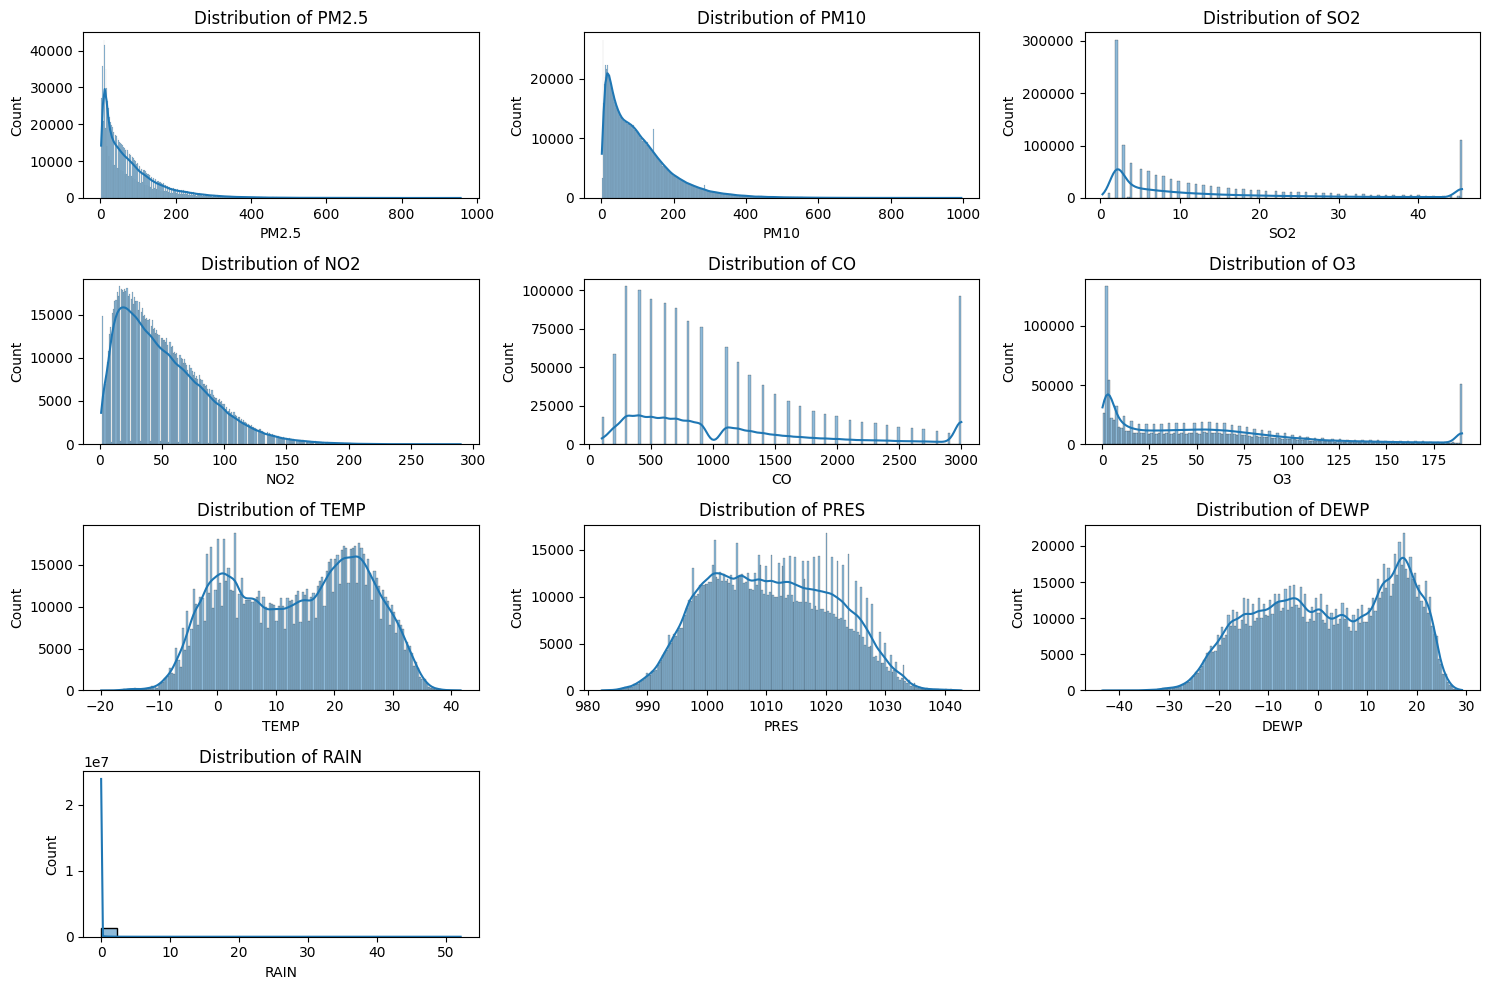

In [19]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']):
    plt.subplot(4, 3, i+1)
    sns.histplot(combined_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

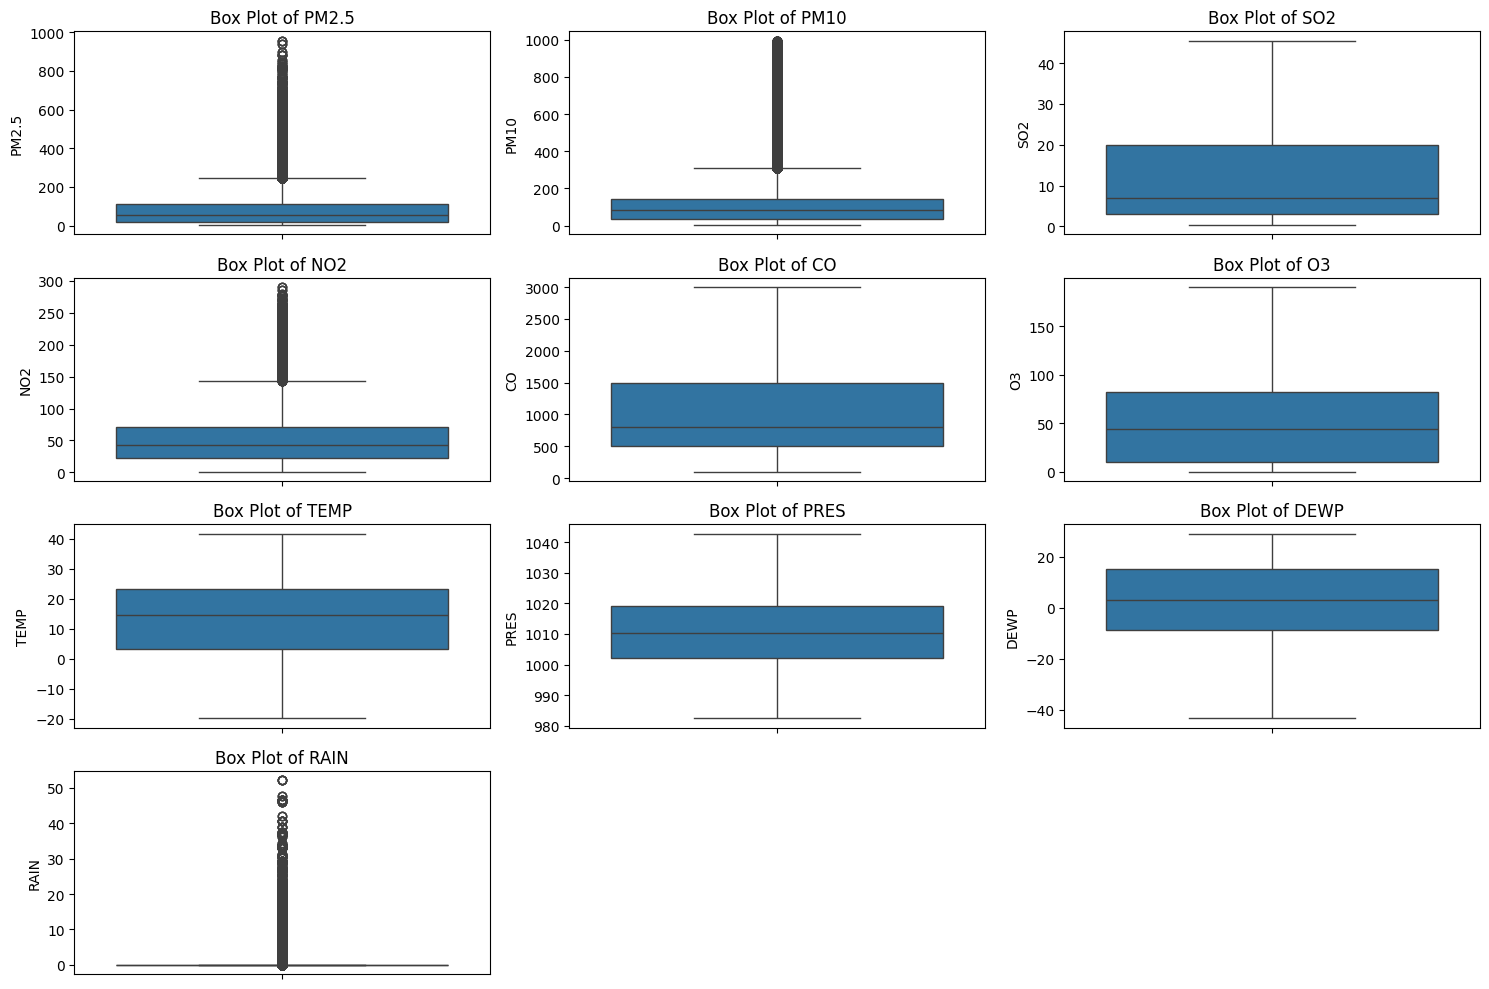

In [20]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=combined_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

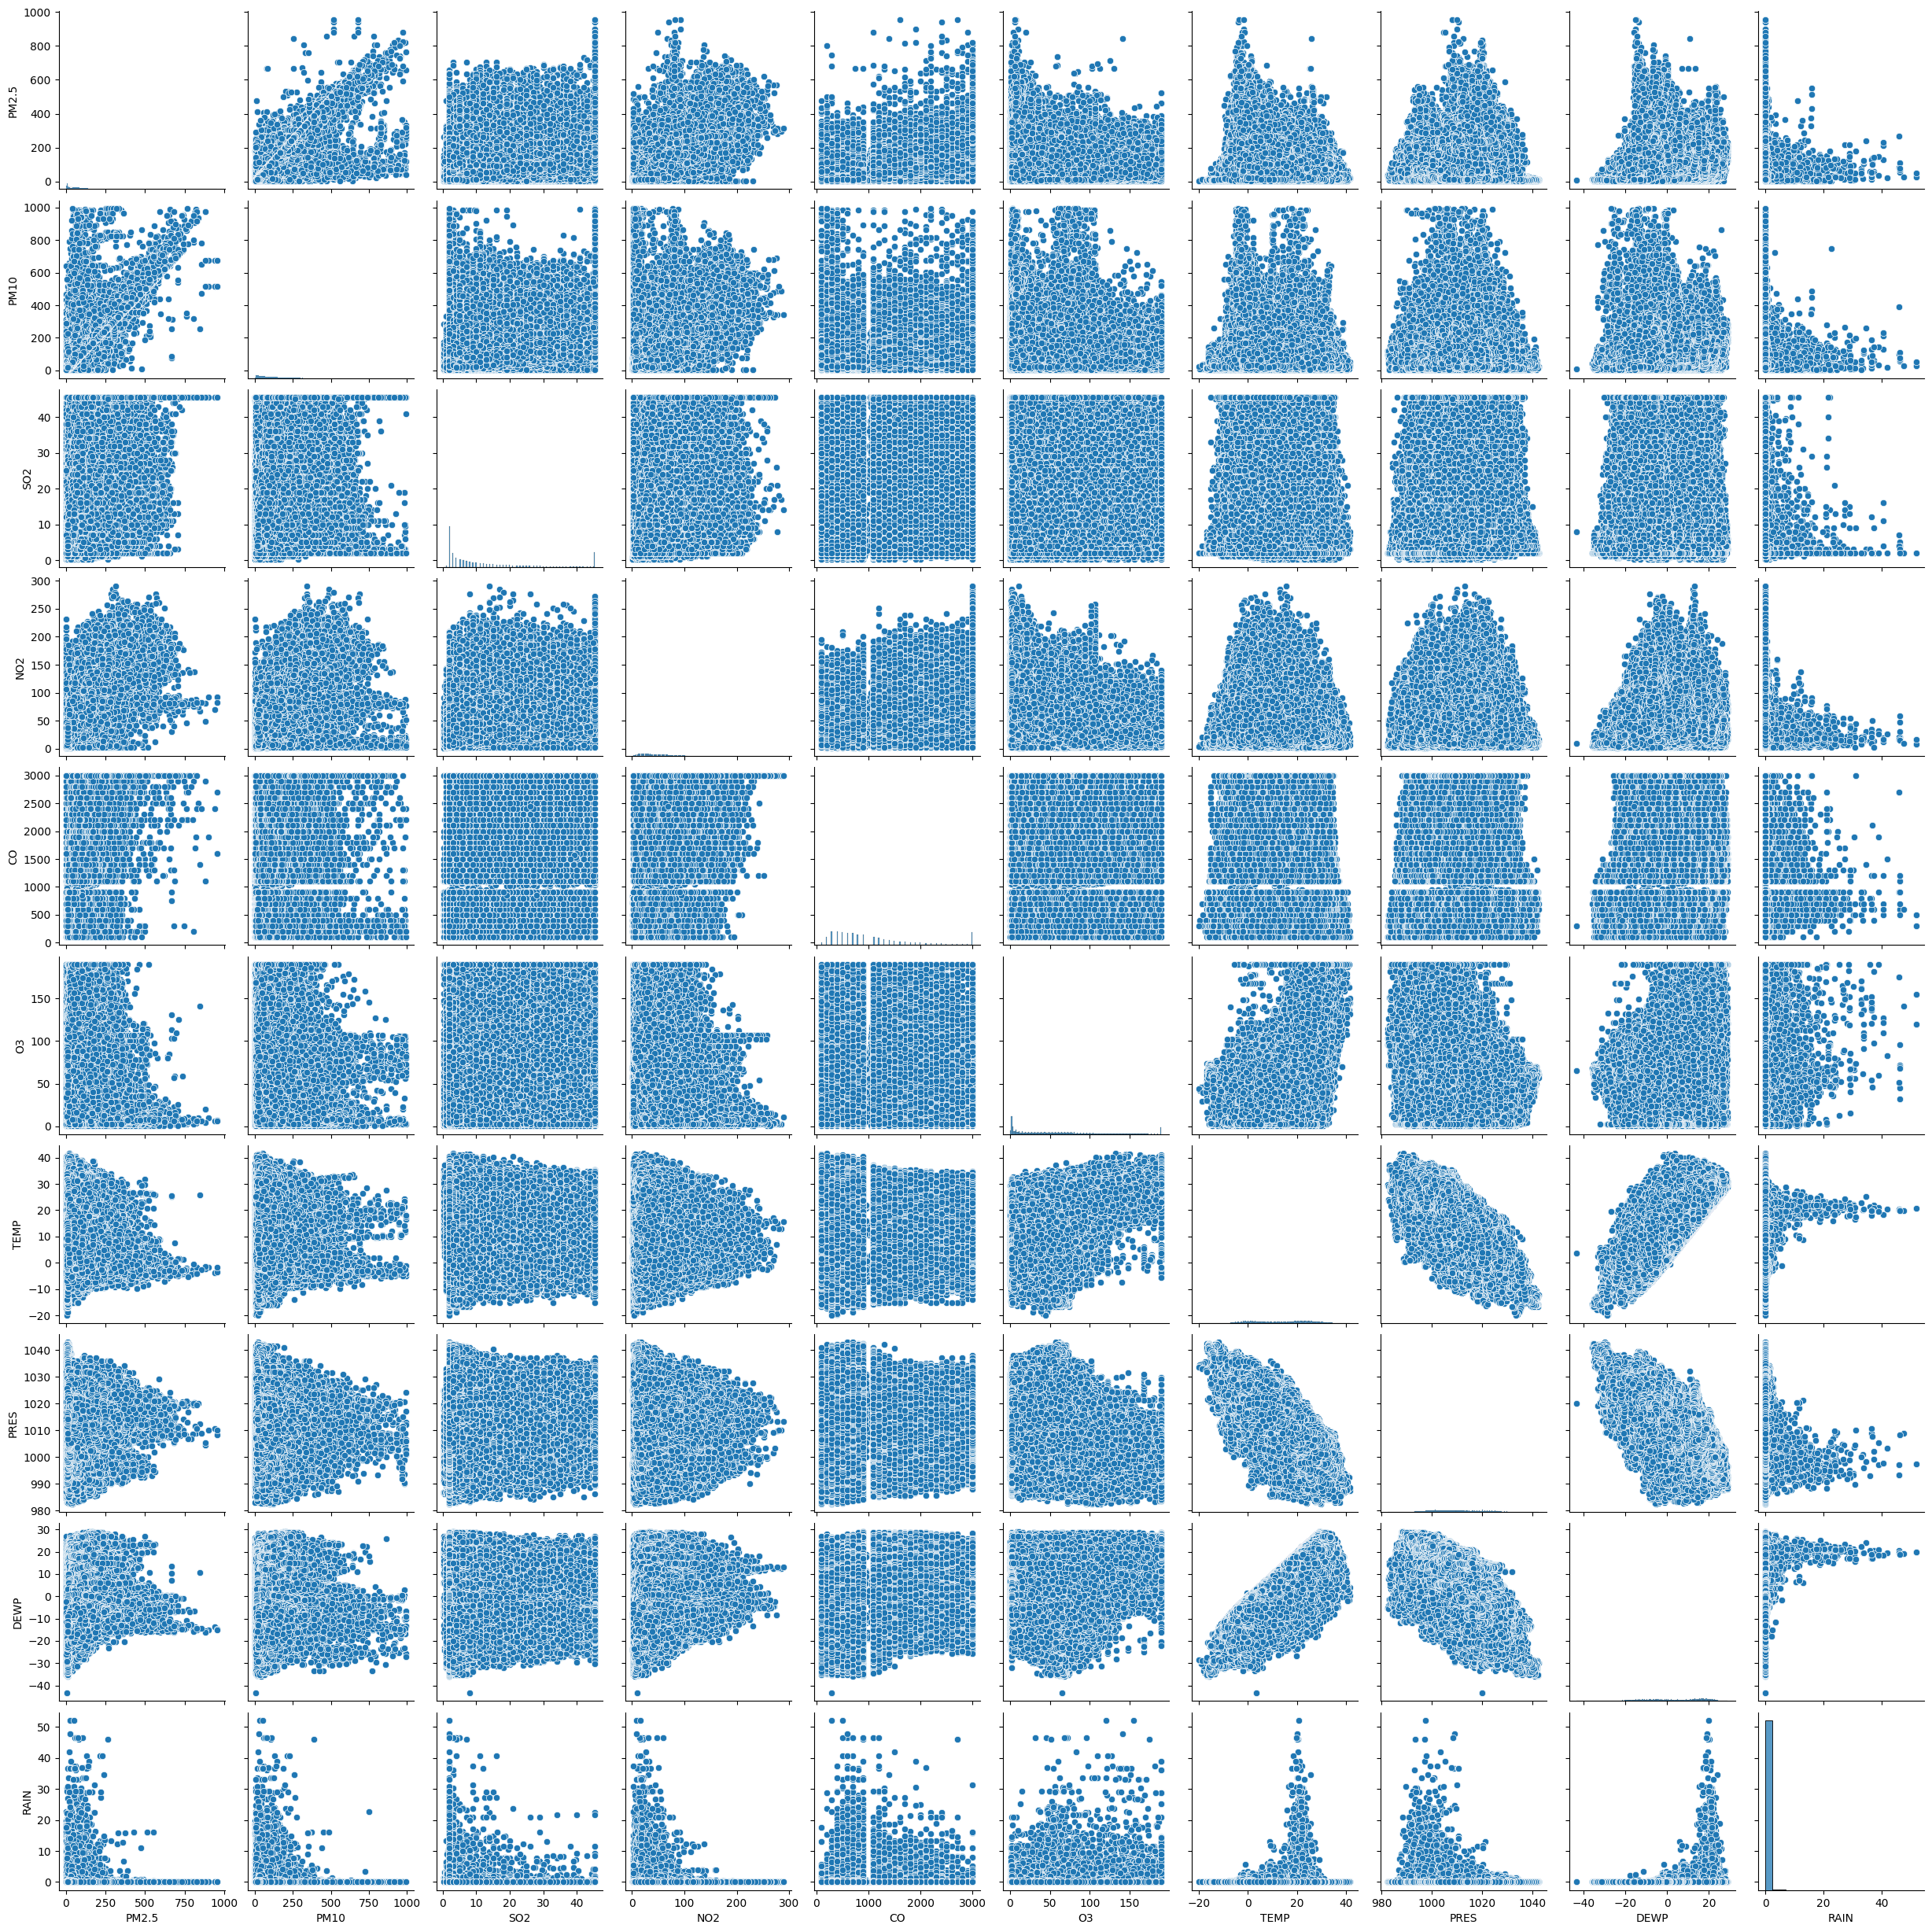

In [21]:
sns.pairplot(combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']])
plt.show()

In [22]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']:
    outliers = find_outliers(combined_data[column])
    print(f'Outliers in {column}: {len(outliers)}')

Outliers in PM2.5: 58941
Outliers in PM10: 45354
Outliers in SO2: 0
Outliers in NO2: 21828
Outliers in CO: 0
Outliers in O3: 0
Outliers in TEMP: 0
Outliers in PRES: 0
Outliers in DEWP: 0
Outliers in RAIN: 49568


In [23]:
Q1 = combined_data['PM2.5'].quantile(0.25)
Q3 = combined_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_pollution = combined_data[combined_data['PM2.5'] > upper_bound]
extreme_times = extreme_pollution.groupby('station')['PM2.5'].idxmax()
print('Waktu dengan PM2.5 tertinggi per station:')
print(extreme_times)

Waktu dengan PM2.5 tertinggi per station:
station
Aotizhongxin    2016-02-08 02:00:00
Changping       2016-02-08 02:00:00
Dingling        2016-02-08 01:00:00
Dongsi          2014-02-14 23:00:00
Guanyuan        2015-12-01 14:00:00
Gucheng         2014-02-14 22:00:00
Huairou         2015-02-19 02:00:00
Nongzhanguan    2013-05-05 12:00:00
Shunyi          2016-02-08 02:00:00
Tiantan         2016-02-08 03:00:00
Wanliu          2016-02-08 02:00:00
Wanshouxigong   2016-02-08 02:00:00
data.csv        2016-02-08 02:00:00
Name: PM2.5, dtype: datetime64[ns]


In [24]:
combined_data.sort_index(inplace=True)

In [25]:
extreme_weather = combined_data.loc['2017-02-14':'2017-02-16']
weather_summary = extreme_weather.groupby('datetime')[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()
print('Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:')
print(weather_summary)

Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:
                         TEMP         PRES       DEWP  RAIN      WSPM
datetime                                                             
2017-02-14 00:00:00  0.983333  1029.383333  -9.366667   0.0  1.341667
2017-02-14 01:00:00 -0.150000  1029.616667  -8.291667   0.0  1.616667
2017-02-14 02:00:00 -0.716667  1029.700000  -7.383333   0.0  1.233333
2017-02-14 03:00:00 -1.700000  1029.808333  -7.791667   0.0  0.958333
2017-02-14 04:00:00 -2.425000  1029.933333  -7.766667   0.0  0.891667
...                       ...          ...        ...   ...       ...
2017-02-16 19:00:00  4.825000  1020.325000 -17.000000   0.0  2.741667
2017-02-16 20:00:00  4.141667  1021.308333 -16.708333   0.0  3.275000
2017-02-16 21:00:00  3.350000  1022.691667 -17.208333   0.0  3.491667
2017-02-16 22:00:00  2.641667  1023.716667 -18.566667   0.0  3.966667
2017-02-16 23:00:00  1.516667  1024.633333 -19.850000   0.0  3.658333

[72 rows x 5 columns]


In [27]:
pairplot_data = combined_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
display(pairplot_data)

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']:
    outliers = find_outliers(combined_data[column])
    print(f'Outliers in {column}: {len(outliers)}')

Q1 = combined_data['PM2.5'].quantile(0.25)
Q3 = combined_data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

extreme_pollution = combined_data[combined_data['PM2.5'] > upper_bound]
extreme_times = extreme_pollution.groupby('station')['PM2.5'].idxmax()
print('Waktu dengan PM2.5 tertinggi per station:')
print(extreme_times)

combined_data.sort_index(inplace=True)
extreme_weather = combined_data.loc['2017-02-14':'2017-02-16']
weather_summary = extreme_weather.groupby('datetime')[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].mean()
print('Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:')
print(weather_summary)

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.878440  0.476804  0.665016  0.765669 -0.172529 -0.131433   
PM10   0.878440  1.000000  0.462166  0.643519  0.669534 -0.131315 -0.095420   
SO2    0.476804  0.462166  1.000000  0.523808  0.603284 -0.186782 -0.360871   
NO2    0.665016  0.643519  0.523808  1.000000  0.714573 -0.497245 -0.277898   
CO     0.765669  0.669534  0.603284  0.714573  1.000000 -0.363434 -0.315515   
O3    -0.172529 -0.131315 -0.186782 -0.497245 -0.363434  1.000000  0.608207   
TEMP  -0.131433 -0.095420 -0.360871 -0.277898 -0.315515  0.608207  1.000000   
PRES   0.019730 -0.018240  0.259744  0.173886  0.178767 -0.455056 -0.813382   
DEWP   0.113995  0.068475 -0.308311 -0.031177 -0.020797  0.311562  0.820253   
RAIN  -0.016018 -0.027698 -0.050820 -0.044725 -0.010576  0.026703  0.038203   

           PRES      DEWP      RAIN  
PM2.5  0.019730  0.113995 -0.016018  
PM10  -0.018240  0.068475 -0.027698  
SO2    0.259744 -0.308311 -0.050820  
NO2    0.173886 -0.031177 -0.044725  
CO     0.178767 -0.020797 -0.010576  
O3    -0.455056  0.311562  0.026703  
TEMP  -0.813382  0.820253  0.038203  
PRES   1.000000 -0.750373 -0.062110  
DEWP  -0.750373  1.000000  0.087840  
RAIN  -0.062110  0.087840  1.000000

Outliers in PM2.5: 58941
Outliers in PM10: 45354
Outliers in SO2: 0
Outliers in NO2: 21828
Outliers in CO: 0
Outliers in O3: 0
Outliers in TEMP: 0
Outliers in PRES: 0
Outliers in DEWP: 0
Outliers in RAIN: 49568
Waktu dengan PM2.5 tertinggi per station:
station
Aotizhongxin    2016-02-08 02:00:00
Changping       2016-02-08 02:00:00
Dingling        2016-02-08 01:00:00
Dongsi          2014-02-14 23:00:00
Guanyuan        2015-12-01 14:00:00
Gucheng         2014-02-14 22:00:00
Huairou         2015-02-19 02:00:00
Nongzhanguan    2013-05-05 12:00:00
Shunyi          2016-02-08 02:00:00
Tiantan         2016-02-08 03:00:00
Wanliu          2016-02-08 02:00:00
Wanshouxigong   2016-02-08 02:00:00
data.csv        2016-02-08 02:00:00
Name: PM2.5, dtype: datetime64[ns]
Rangkuman kondisi cuaca di sekitar waktu polusi ekstrem:
                         TEMP         PRES       DEWP  RAIN      WSPM
datetime                                                             
2017-02-14 00:00:00  0.983333  1029.383